## import

In [742]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [743]:
erp = pd.read_csv('C:\\Users\\antoi\\OneDrive\\Bureau\\openclassrooms\\Projet 5\\erp.csv',sep=';')
web = pd.read_csv('C:\\Users\\antoi\\OneDrive\\Bureau\\openclassrooms\\Projet 5\\web.csv', sep =';')
liaison = pd.read_csv('C:\\Users\\antoi\\OneDrive\\Bureau\\openclassrooms\\Projet 5\\liaison.csv',sep=';')

# Fichiers

In [744]:
def etude_fichier(df):
    # Etude du fichier 
    print("Nombre de colonnes :", df.shape)
    print()
    print("Le type est : \n", df.dtypes)
    print()
    print('Nombre de unique')
    print(df.nunique())
    print()
    print('le nombre de null est :\n',df.isnull().sum())

## erp

In [745]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,"24,2",0,outofstock
1,3849,1,"34,3",0,outofstock
2,3850,1,"20,8",0,outofstock
3,4032,1,"14,1",0,outofstock
4,4039,1,46,0,outofstock


In [746]:
etude_fichier(erp)

Nombre de colonnes : (825, 5)

Le type est : 
 product_id         int64
onsale_web         int64
price             object
stock_quantity     int64
stock_status      object
dtype: object

Nombre de unique
product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
dtype: int64

le nombre de null est :
 product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


In [747]:
# Modification du type de price
erp["price"] = erp["price"].str.replace(",",".").astype(float)

## liaison

In [748]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [749]:
etude_fichier(liaison)

Nombre de colonnes : (825, 2)

Le type est : 
 product_id     int64
id_web        object
dtype: object

Nombre de unique
product_id    825
id_web        734
dtype: int64

le nombre de null est :
 product_id     0
id_web        91
dtype: int64


Il manque 91 correspondance entre les produits et l'identifiant SKu

In [750]:
# Modification du nom de la colonne
liaison = liaison.rename(columns={"id_web":"sku"})

## web

In [751]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [752]:
etude_fichier(web)

Nombre de colonnes : (1513, 28)

Le type est : 
 sku                       object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales              float64
tax_status                object
tax_class                float64
post_author              float64
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type                 object
post_mime_type            object
comment_count            float64
dtype: object

Nombre de un

Nous avons 85 clés 'sku' manquantes

In [753]:
# Je commence par supprimer toutes les lignes ou 'sku' n'est pas renseigné
web = web.dropna(subset = ['sku'])
web.shape

(1428, 28)

In [754]:
# Je cherche si des doublons sont présents
web.duplicated(subset='sku')

0       False
1       False
2       False
3       False
4       False
        ...  
1508     True
1509     True
1510     True
1511     True
1512     True
Length: 1428, dtype: bool

In [755]:
# Effectivement on constate la présence de doublons, l'hypothèse est que tout les produits sont en doubles
web.loc[web.duplicated(subset = 'sku',keep='first'),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,NaN,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,NaN,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,NaN,publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,NaN,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,NaN,Pierre Jean Villa Côte Rôtie Carmina 2017,NaN,publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,NaN,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,NaN,publish,closed,closed,NaN,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,NaN,Camin Larredya Jurançon Sec La Virada 2018,NaN,publish,closed,closed,NaN,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,NaN,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,NaN,publish,closed,closed,NaN,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,publish,closed,closed,NaN,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


J'ai 714 lignes qui sont des doublons, soit la moitié de mes 1428 lignes de départ
J'ai identifié une colonne dont le contenu diffère entre mes lignes produits et leurs doublons
Je vais donc vérifier le contenu de cette colonne, puis ne conserver que les lignes pour lesquelles une valeur est indiquée dans cette colonne

In [756]:
pd.unique(web['tax_status'])

array(['taxable', nan], dtype=object)

In [757]:
web = web.loc[web['tax_status'] == 'taxable']
web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,NaN,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,closed,closed,NaN,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,NaN,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,closed,closed,NaN,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,NaN,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,closed,closed,NaN,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,closed,closed,NaN,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


J'obtiens bien un tableau avec 714 lignes qui correspondent à mes références d'articles

In [758]:
# Je vérifie que mon DF ne contient plus de doublons
web.loc[web.duplicated(subset='sku')== True]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


Il n'y a plus de doublons

# Jointures

## jointure entre erp et liaison

In [759]:
#Test de jointure entre Erp et Liaison, on utilise outer pour garder toutes les lignes des deux dataframes on aura des valeurs manquantes si il n'y a pas de correspondance
Test_1 = pd.merge(erp, liaison, how="outer", on="product_id", indicator=True)

In [760]:
etude_fichier(Test_1)

Nombre de colonnes : (825, 7)

Le type est : 
 product_id           int64
onsale_web           int64
price              float64
stock_quantity       int64
stock_status        object
sku                 object
_merge            category
dtype: object

Nombre de unique
product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
sku               734
_merge              1
dtype: int64

le nombre de null est :
 product_id         0
onsale_web         0
price              0
stock_quantity     0
stock_status       0
sku               91
_merge             0
dtype: int64


## test de jointure entre erp, liaison et web

In [761]:
#Test de jointure entre Erp, Liaison et Web
Test_2 = pd.merge(erp, liaison, how="outer", on="product_id")
Test_2 = pd.merge(Test_2, web, how="outer", on="sku", indicator=True) # nouvelle colonne pour savoir d'ou vient la ligne

In [762]:
etude_fichier(Test_2)

Nombre de colonnes : (825, 34)

Le type est : 
 product_id                  int64
onsale_web                  int64
price                     float64
stock_quantity              int64
stock_status               object
sku                        object
virtual                   float64
downloadable              float64
rating_count              float64
average_rating            float64
total_sales               float64
tax_status                 object
tax_class                 float64
post_author               float64
post_date                  object
post_date_gmt              object
post_content              float64
post_title                 object
post_excerpt               object
post_status                object
comment_status             object
ping_status                object
post_password             float64
post_name                  object
post_modified              object
post_modified_gmt          object
post_content_filtered     float64
post_parent               float64


In [763]:
#data temporaire pour web et liaison pour faire les manipulations
webt = web
liaisont = liaison

#drop les sku avec valeurs null dans web et liaison voir les études de fichier au dessus
webt = webt.dropna(subset=["sku"])
liaisont = liaisont.dropna(subset=["sku"])

#Affiche les lignes qui n'ont pas de correspondance entre Erp, Liaison et Web
Test_2.loc[Test_2["_merge"]=="left_only"]

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,5954,0,18.8,0,outofstock,15609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
718,5955,0,27.3,0,outofstock,14377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
720,5957,0,39.0,0,outofstock,13577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
743,6100,0,12.9,0,outofstock,15529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


on garde les fichiers temporaires que l'on a nettoyé pour faire les liaisons et calculer le CA

## jointure final

In [764]:
#laison erp et liaisont
All = pd.merge(erp, liaisont, on= "product_id")

#liaison all et webt
All = pd.merge(All, webt, on="sku")

In [765]:
etude_fichier(All)

Nombre de colonnes : (714, 33)

Le type est : 
 product_id                 int64
onsale_web                 int64
price                    float64
stock_quantity             int64
stock_status              object
sku                       object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales              float64
tax_status                object
tax_class                float64
post_author              float64
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      ob

# Etude CA

## création colonne ca

In [766]:
#Ajoute la colonne CA correspondant au Chiffre d'Affaire par produit
All["CA"]=All["total_sales"]*All["price"]

In [767]:
#Calcule le chiffre d'affaire total
Total_CA = All["CA"].sum()
print("Le chiffre d'affaires total est de",Total_CA,"€")

Le chiffre d'affaires total est de 70568.6 €


## Analyse CA

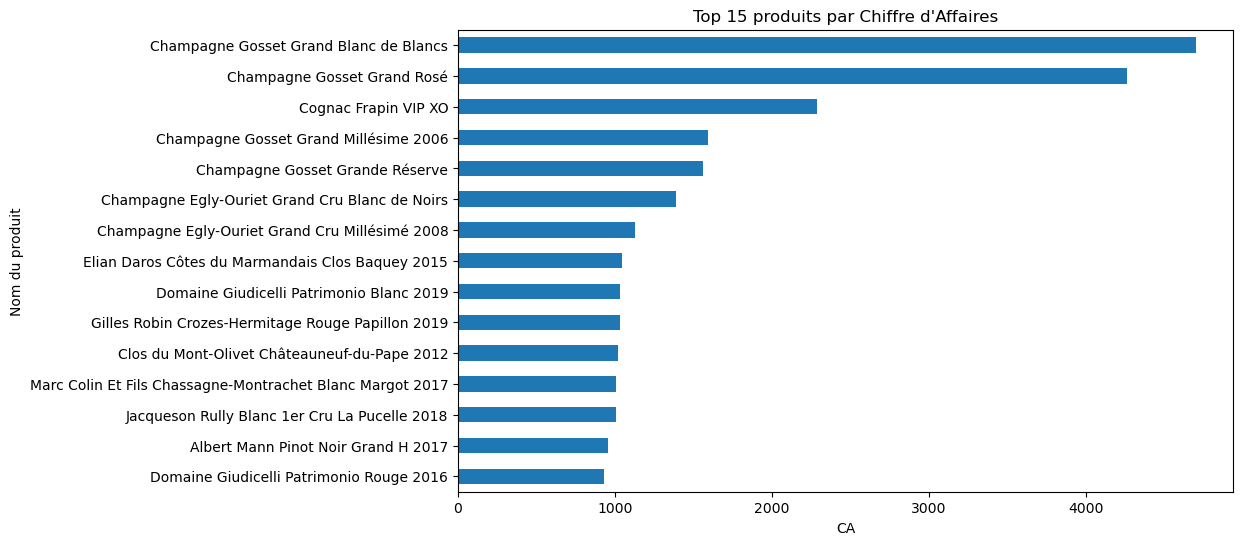

In [768]:
#Regroupement du DataFrame par nom de produit et calcul de la somme du CA
product_ca = All.groupby('post_title')['CA'].sum().sort_values(ascending=False)
    
# Sélection des n produits les plus importants
top_products = product_ca.head(15)
    
# Création d'un graphique à barres horizontales avec l'axe y inversé
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh')
plt.xlabel('CA')
plt.ylabel('Nom du produit')
plt.title(f'Top {15} produits par Chiffre d\'Affaires')
plt.gca().invert_yaxis()  # Inversion de l'axe y pour afficher les noms de haut en bas
plt.show()

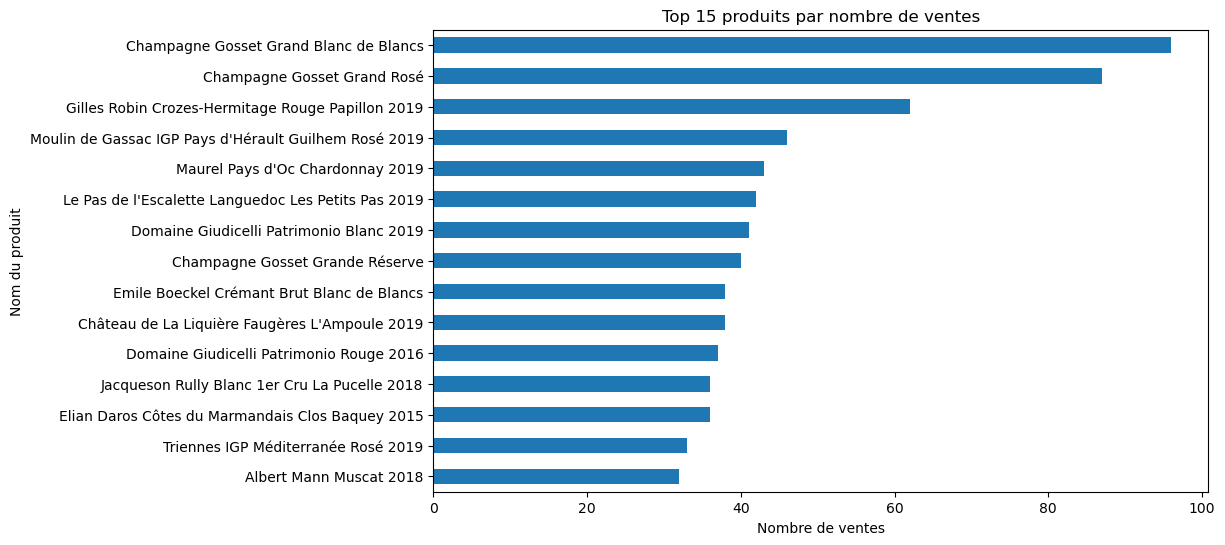

In [769]:
# Regroupement du DataFrame par nom de produit et calcul de la somme des ventes totales
product_sales = All.groupby('post_title')['total_sales'].sum().sort_values(ascending=False)
    
# Sélection des n produits les plus importants
top_products = product_sales.head(15)
    
# Création d'un graphique à barres horizontales avec l'axe y inversé
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh')
plt.xlabel('Nombre de ventes')
plt.ylabel('Nom du produit')
plt.title(f'Top {15} produits par nombre de ventes')
plt.gca().invert_yaxis()  #  Inversion de l'axe y pour afficher les noms de haut en bas
plt.show()

# Etude outliers

In [770]:
# Tri de colonnes 
All = All[['product_id','price','total_sales',"CA", "post_title"]].sort_values('price')

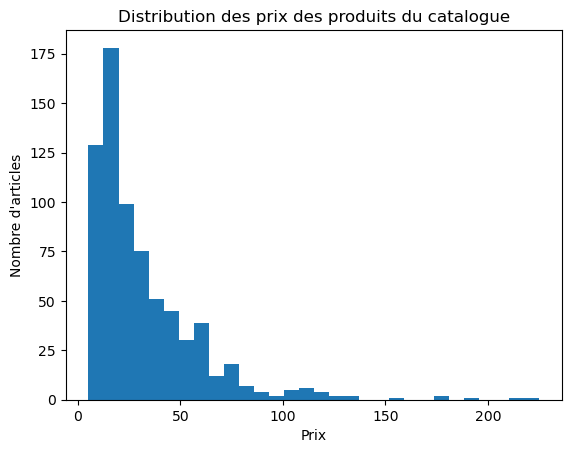

In [771]:
# Distribution des prix des produits du catalogue
plt.hist(All['price'], bins = 30)
plt.title('Distribution des prix des produits du catalogue')
plt.xlabel('Prix')
plt.ylabel("Nombre d'articles")
plt.show()

In [772]:
# Calcul de la médiane absolue de la déviation
median = np.median(All['price'])
mad = np.median(np.abs(All['price'] - median))
print('En moyenne, les valeurs de "price" s\'écartent de la médiane d\'environ', round(mad), 'unités.')

En moyenne, les valeurs de "price" s'écartent de la médiane d'environ 11 unités.


In [773]:
from scipy import stats

# Calcul du Z-score pour chaque valeur de prix
z_scores = stats.zscore(All['price'])

# Détermination des seuils pour définir les outliers (par exemple, seuil de 3 écarts-types)
threshold = 3


# Identification des indices des outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)

# Affichage des valeurs de prix outliers
outliers = All.loc[outlier_indices]['price']
print("Outliers:")
print(outliers)

Outliers:
700    15.4
701    46.5
702    46.5
703    46.5
704    42.0
705    21.8
706    50.5
707    49.9
708    19.0
709     8.4
710    27.5
711    69.0
712    54.8
713    16.3
Name: price, dtype: float64


In [774]:
# Calcul des quartiles
q1 = All['price'].quantile(0.25)
q3 = All['price'].quantile(0.75)
print(q1)
print(q3)

14.1
42.175000000000004


In [775]:
# Calcul de l'IQR
iqr = q3 - q1
print(iqr)

28.075000000000003


In [776]:
# Définition des bornes supérieure et inférieure pour les outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound)
print(upper_bound)

-28.012500000000003
84.28750000000001


In [777]:
# Identification des outliers
outliers = All[(All['price'] < lower_bound) | (All['price'] > upper_bound)]

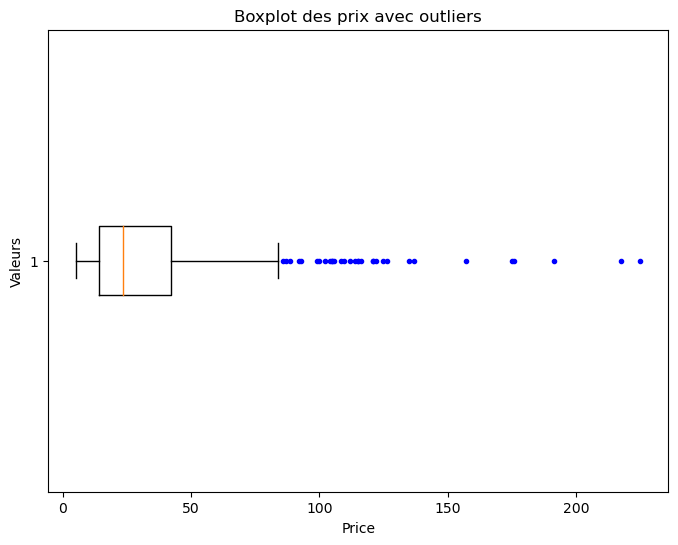

In [778]:
# Création du boxplot avec outliers
plt.figure(figsize=(8, 6))
plt.boxplot(All['price'], whis=1.5, sym='b.', vert=False)
plt.title("Boxplot des prix avec outliers")
plt.xlabel("Price")
plt.ylabel("Valeurs")
plt.show()

In [779]:
outliers.head()

,product_id,price,total_sales,CA,post_title
205,4359,85.6,1.0,85.6,Champagne Larmandier-Bernier Grand Cru Les Che...
438,5026,86.8,0.0,0.0,Champagne Agrapart &amp; Fils Minéral Extra Br...
65,4132,88.4,0.0,0.0,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...
502,5565,92.0,0.0,0.0,Tempier Bandol Cabassaou 2017
602,5916,93.0,0.0,0.0,Wemyss Malts Single Cask Scotch Whisky Chocola...


In [780]:
etude_fichier(outliers)

Nombre de colonnes : (32, 5)

Le type est : 
 product_id       int64
price          float64
total_sales    float64
CA             float64
post_title      object
dtype: object

Nombre de unique
product_id     32
price          29
total_sales     7
CA             11
post_title     32
dtype: int64

le nombre de null est :
 product_id     0
price          0
total_sales    0
CA             0
post_title     0
dtype: int64


In [781]:
outliers

,product_id,price,total_sales,CA,post_title
205,4359,85.6,1.0,85.6,Champagne Larmandier-Bernier Grand Cru Les Che...
438,5026,86.8,0.0,0.0,Champagne Agrapart &amp; Fils Minéral Extra Br...
65,4132,88.4,0.0,0.0,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...
502,5565,92.0,0.0,0.0,Tempier Bandol Cabassaou 2017
602,5916,93.0,0.0,0.0,Wemyss Malts Single Cask Scotch Whisky Chocola...
655,6214,99.0,0.0,0.0,Domaine des Comtes Lafon Volnay 1er Cru Champa...
63,4115,100.0,0.0,0.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...
380,4903,102.3,0.0,0.0,Domaine Des Croix Corton Grand Cru Les Grèves ...
222,4407,104.0,1.0,104.0,Cognac Frapin Cigar Blend
432,5008,105.0,0.0,0.0,Domaine des Comtes Lafon Volnay 1er Cru Santen...


On peut se rendre compte que la majorité des ventes sont sur des produits qui sont à moins de 50 euros, les outliers eu nous trouvons sont des bouteilles avec des prix élevés. Dans le cadre d'une boutique de vins ces résultats ne sont pas choquants, il y a beaucoup de bouteilles qui peuvent se vendre à des prix élevés nottament les grands crus.